# Q) Glass: > Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Get Data

In [2]:
gf=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\DATA SCIENCE\\Datasets\\glass.csv')
gf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Standardization of variables 
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters.Variables having a large scale will have  much larger effect on the distance between the observations, and hence on the KNN classifier than variables that are on a small scale.

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(gf.drop('Type',axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.transform(gf.drop('Type',axis=1))

In [7]:
gf_feat = pd.DataFrame(scaled_features,columns=gf.columns[:-1])
gf_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


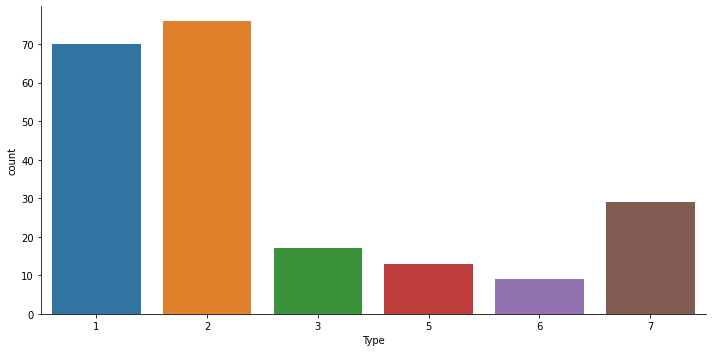

In [8]:
sns.factorplot('Type', data=gf, kind="count",size = 5,aspect = 2)

As shown in the grapg majority of the glass types are building_windows_float_processed and building_windows_non_float_processed, followed by headlamps.

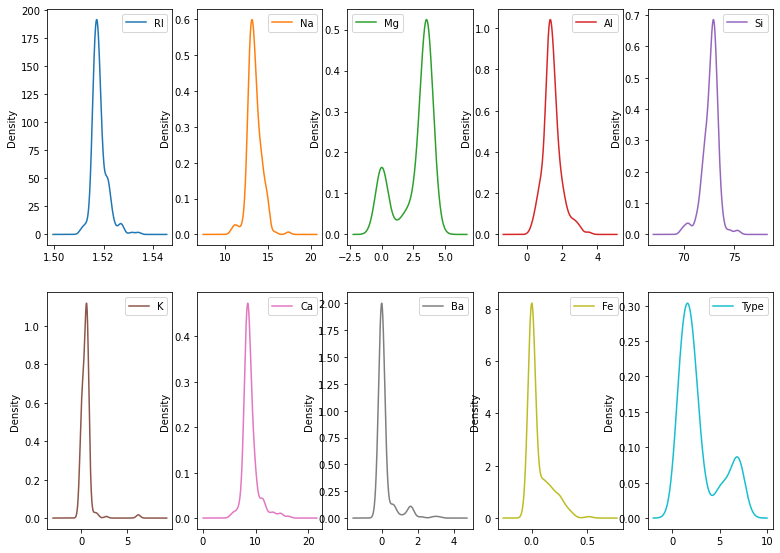

In [9]:
gf.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

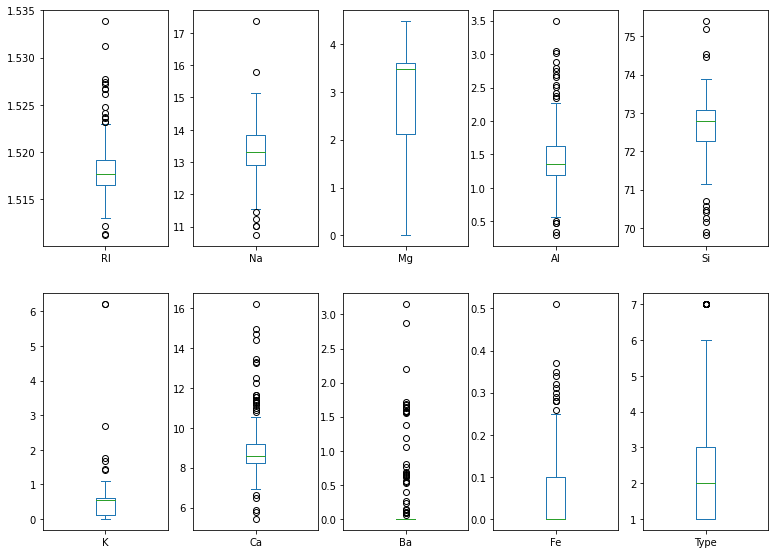

In [10]:
gf.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

# Finding correlation 

In [11]:
cor = gf.corr(method='pearson')

In [12]:
cor.style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


As seen in the above graph, there is a high correlation exists between some of the variables.

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,gf['Type'],
                                                    test_size=0.30)

# Using KNN
preparing of model to predict that a glass belongs to 'type' or not.So first take k=1

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred = knn.predict(X_test)

# Predictions and Evaluations
Evaluating the KNN model

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [20]:
print(confusion_matrix(y_test,pred))

[[13  1  2  0  0  0]
 [ 4 18  0  2  0  0]
 [ 2  1  2  0  0  0]
 [ 1  0  0  3  0  2]
 [ 0  1  0  0  1  1]
 [ 1  0  0  1  0  9]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.62      0.81      0.70        16
           2       0.86      0.75      0.80        24
           3       0.50      0.40      0.44         5
           5       0.50      0.50      0.50         6
           6       1.00      0.33      0.50         3
           7       0.75      0.82      0.78        11

    accuracy                           0.71        65
   macro avg       0.70      0.60      0.62        65
weighted avg       0.73      0.71      0.70        65



# Choosing a K Value
Using elbow method to choose a good K value:

In [22]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,gf_feat,gf['Type'],cv=10)
    accuracy_rate.append(score.mean())

In [23]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,gf_feat,gf['Type'],cv=10)
    error_rate.append(1-score.mean())

In [24]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Accuracy rate')

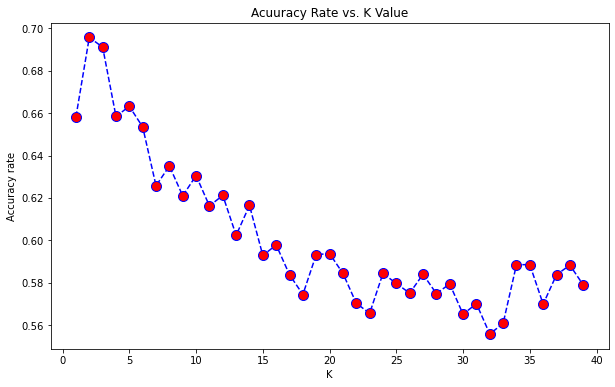

In [25]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Acuuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy rate')

here k>7 so that the accuracy just tends to hover around 0.60 to 0.58

Text(0, 0.5, 'Error Rate')

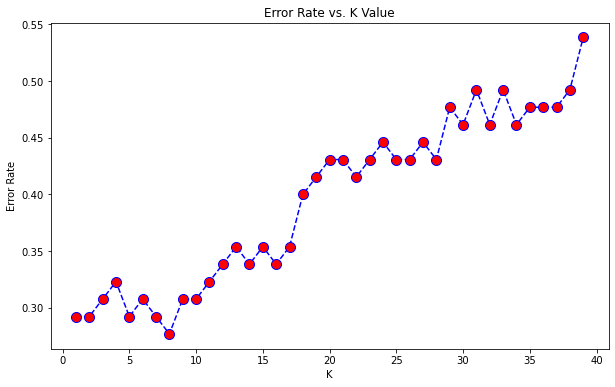

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

here k>7 so that the error just tends to hover around 0.34 to 0.36

In [27]:
# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[14  2  0  0  0  0]
 [ 5 17  0  1  1  0]
 [ 2  3  0  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 1  0  0  0  0 10]]


              precision    recall  f1-score   support

           1       0.64      0.88      0.74        16
           2       0.65      0.71      0.68        24
           3       0.00      0.00      0.00         5
           5       0.75      0.50      0.60         6
           6       0.67      0.67      0.67         3
           7       1.00      0.91      0.95        11

    accuracy                           0.71        65
   macro avg       0.62      0.61      0.61        65
weighted avg       0.67      0.71      0.68        65

